# **Detecção de Fraudes em Transações Financeiras**

Luiz Henrique Rigo Faccio | CCR de `Inteligência Artifical`

*Ciência da Computação - Universidade Federal Da Fronteira Sul*

Dataset disponível em: [https://www.kaggle.com/datasets/aryan208/financial-transactions-dataset-for-fraud-detection](https://www.kaggle.com/datasets/aryan208/financial-transactions-dataset-for-fraud-detection)

## **Importando bibliotecas e o dataset**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import datetime as dt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler  

In [11]:
path = "archive/financial_fraud_detection_dataset.csv"
dataSet = pd.read_csv(path)

## **Vizualizando as informações**

In [3]:
def numeric_columns(dataSet):
    return dataSet.select_dtypes(include=['int64', 'float64']).columns
def categorical_columns(dataSet): 
    return dataSet.select_dtypes(include=['object']).columns

def analyse_target(dataSet):
    print("Target:")
    dataSet["is_fraud"].value_counts().plot(kind='bar', title='Distribuição da variável alvo')
    total = dataSet.shape[0]
    counts = dataSet["is_fraud"].value_counts()
    percentages = counts / total * 100
    for value, count in counts.items():
        print(f"Classe {value}: {count} ({percentages[value]:.4f}%)")

def analyze_data(dataSet):
    info = pd.DataFrame({"Tipos":dataSet.dtypes, "Valores únicos": dataSet.nunique(), "Valores Nulos": dataSet.isnull().sum()})
    
    print("Dimensão do dataset: ", dataSet.shape)
    display(info)

    print("Informações contínuas:")
    display(dataSet[numeric_columns(dataSet)].describe().round(3))

    if (categorical_columns(dataSet).size > 0):
        print("Informações categóricas:")
        display(dataSet[categorical_columns(dataSet)].describe().round(3))

    analyse_target(dataSet)

    print("Amostra do dataset:")
    display(dataSet.sample(5))

Dimensão do dataset:  (5000000, 18)


,Tipos,Valores únicos,Valores Nulos
transaction_id,object,5000000,0
timestamp,object,4999998,0
sender_account,object,896513,0
receiver_account,object,896639,0
amount,float64,217069,0
transaction_type,object,4,0
merchant_category,object,8,0
location,object,8,0
device_used,object,4,0
is_fraud,bool,2,0


Informações contínuas:


,amount,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score
count,5000000.000,4103487.000,5000000.000,5000000.000,5000000.000
mean,358.934,1.526,-0.000,10.501,0.500
std,469.933,3576.569,1.001,5.767,0.289
min,0.010,-8777.814,-5.260,1.000,0.000
25%,26.570,-2562.376,-0.680,5.000,0.250
50%,138.670,0.844,0.000,11.000,0.500
75%,503.890,2568.339,0.670,16.000,0.750
max,3520.570,8757.758,5.020,20.000,1.000


Informações categóricas:


,transaction_id,timestamp,sender_account,receiver_account,transaction_type,merchant_category,location,device_used,fraud_type,payment_channel,ip_address,device_hash
count,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,179553,5000000,5000000,5000000
unique,5000000,4999998,896513,896639,4,8,8,4,1,4,4997068,3835723
top,T100000,2023-12-14T01:56:37.401698,ACC983922,ACC400278,deposit,retail,Tokyo,mobile,card_not_present,wire_transfer,135.227.29.146,D7441961
freq,1,2,20,23,1250593,626319,625994,1251131,179553,1251219,2,9


Target:
Classe False: 4820447 (96.4089%)
Classe True: 179553 (3.5911%)
Amostra do dataset:


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
2575307,T2675307,2023-12-10T06:54:21.325735,ACC438002,ACC728298,115.57,withdrawal,grocery,Tokyo,mobile,False,NaN,2746.163237,0.49,18,0.30,card,181.81.29.124,D4949162
2364105,T2464105,2023-03-29T11:49:55.917543,ACC590696,ACC728980,376.16,withdrawal,entertainment,Dubai,pos,False,NaN,NaN,0.98,15,0.79,UPI,122.3.198.26,D9285033
3868433,T3968433,2023-05-15T08:09:38.785092,ACC886851,ACC571182,917.36,deposit,retail,Sydney,pos,False,NaN,-3245.052663,-0.59,11,0.86,ACH,24.200.50.104,D2682268
2778403,T2878403,2023-01-11T23:46:30.354738,ACC258708,ACC807034,61.42,deposit,travel,London,web,False,NaN,-1707.043735,0.87,11,0.04,ACH,53.134.189.159,D8531716
2066075,T2166075,2023-11-29T08:45:04.363423,ACC634474,ACC371335,233.76,withdrawal,utilities,Tokyo,web,False,NaN,524.151858,0.11,17,0.71,card,69.58.40.100,D8339356


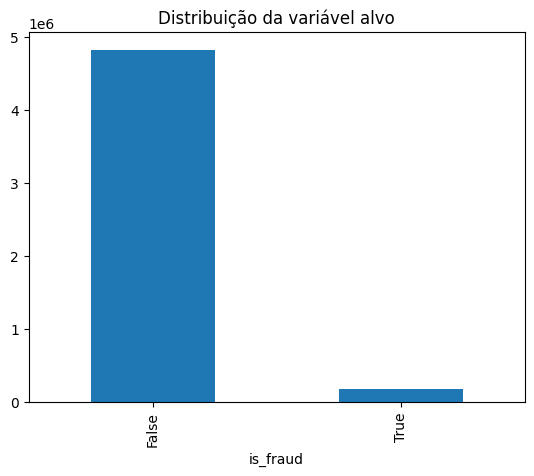

In [12]:
analyze_data(dataSet)

## **Agregação de informações**

Antes de tratar os dados, pode ser interessante adicionar alguns insights sobre as informações já presentes no dataset.

Neste caso, algumas novas features serão adicionadas/calculadas:

| Feature                         | Descrição                                                                                   | Justificativa                                                                                   |
|----------------------------------|--------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
`high_value_transfer` | Binário que identifica se uma transação é de valor muito alto (Acimda do 90º percentil) | Transações de valores altos são mais suspeitas |
`is_new_receiver ` | Binário que identifica se a conta remetente já fez transações para a destinatária | Transações sem precedentes são mais suspeitas |
`unusual_device_hash` | Binário que idenfica se o dispositivo utilizado é diferente do mais comumente utilizado naquela conta | Transações de aparelhos diferentes são mais suspeitas |
`unusual_device_type` | Binário que idenfica se o tipo dispositivo utilizado é diferente do mais comumente utilizado naquela conta | Transações de dispositivos diferentes são mais suspeitas|
`unusual_payment_channel` | Binário que idenfica se o canal de pagamento utilizado é diferente do mais comumente utilizado naquela conta | Transações em canais diferentes são mais suspeitas|
 

In [54]:
## High Value Transfer

threshold = dataSet["amount"].quantile(0.95)
dataSet["high_value_transfer"] = dataSet["amount"] > threshold
dataSet["high_value_transfer"] = dataSet["high_value_transfer"].astype(int)

In [52]:
## Is new Receiver

# Track (sender, receiver) pairs seen so far
seen_pairs = set()

def is_new_receiver(row):
    pair = (row["sender_account"], row["receiver_account"])
    if pair in seen_pairs:
        return 0
    else:
        seen_pairs.add(pair)
        return 1

dataSet["is_new_receiver"] = dataSet.apply(is_new_receiver, axis=1)

In [56]:
display(dataSet[["is_new_receiver"]].value_counts())

is_new_receiver
1                  4999985
0                       15
Name: count, dtype: int64

## **Tratando os dados**

Algumas informações como IDs, tipo de fraude, números de contas e números de dispositivos são inúteis nesta situação

time_since_last_transaction tem muitos valores vazios

In [57]:
useLess = ["transaction_id", "sender_account", "receiver_account", "ip_address", "device_hash", "fraud_type"]

dataSet = dataSet.drop(columns=useLess)

Para não descartar os horários das transações, eles serão agrupados em madrugada, manha, tarde e noite.

In [58]:
def categorize_timestamp(timestamps : pd.Series, int_values: bool = False) -> pd.Series:
    """Função para categorizar timestap em períodos: manhã, tarde, noite e madrugada

    Args:
        timestamps (pd.Series): Coluna de timestamp do DataSet
    
    Returns:
        periodos (pd.Series): Coluna de timestamps já categorizada
    """
    
    def get_period(hour):

        if int_values:
            return hour
        if 6 <= hour < 9:
            return "manha_1"
        if 9 <= hour < 12:
            return "manha_2"
        elif 12 <= hour < 15:
            return "tarde_1"
        elif 15 <= hour < 18:
            return "tarde_2"
        elif 18 <= hour < 21:
            return "noite_1"
        elif 18 <= hour < 21:
            return "noite_2"
        elif 21 <= hour < 23:
            return "tarde_2"
        elif 23 <= hour < 2:
            return "tarde_2"
        elif 2 <= hour < 5:
            return "madrugada_1"
        else:
            return "madrugada_2"

    periodos = timestamps.apply(lambda x: get_period(dt.datetime.fromisoformat(x).hour))
    return periodos
    

In [59]:
dataSet["timestamp"] = categorize_timestamp(dataSet["timestamp"], int_values=True)

Como não existem mais dados faltantes, não será necessário imputá-los (Exceto time_since_last_transaction que será preenchido com zero)

As informações categóricas serão tratadas com o uso de OneHotEncoding e os dados numéricos serão escalados com o uso de StandartScaler (Somente para RNA)

Os valores de y (is_fraud) serão transformados em inteiros

In [60]:
encoder = OneHotEncoder()
encoder.fit(dataSet[categorical_columns(dataSet)])
encoded_data = encoder.transform(dataSet[categorical_columns(dataSet)])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns(dataSet)))
dataSet = dataSet.drop(columns=categorical_columns(dataSet))
dataSet = pd.concat([dataSet, encoded_df], axis=1)

In [61]:

dtc_dataset = dataSet.copy()
dtc_dataset["is_fraud"] = dtc_dataset["is_fraud"].map(lambda x: 1 if x == True else 0)

sacaler = StandardScaler()
dataSet[numeric_columns(dataSet)] = sacaler.fit_transform(dataSet[numeric_columns(dataSet)])

dataSet["is_fraud"] = dataSet["is_fraud"].map(lambda x: 1 if x == True else 0)
rna_dataset = dataSet 


In [62]:
dataSet["time_since_last_transaction"].fillna(0, inplace=True)

Dimensão do dataset:  (5000000, 37)


,Tipos,Valores únicos,Valores Nulos
timestamp,float64,24,0
amount,float64,217069,0
is_fraud,int64,2,0
time_since_last_transaction,float64,4103488,0
spending_deviation_score,float64,917,0
velocity_score,float64,20,0
geo_anomaly_score,float64,101,0
high_value_transfer,int32,2,0
is_new_receiver,float64,2,0
transaction_type_deposit,float64,2,0


Informações contínuas:


,timestamp,amount,is_fraud,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,is_new_receiver,transaction_type_deposit,transaction_type_payment,...,location_Tokyo,location_Toronto,device_used_atm,device_used_mobile,device_used_pos,device_used_web,payment_channel_ACH,payment_channel_UPI,payment_channel_card,payment_channel_wire_transfer
count,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,...,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000
mean,-0.000,0.000,0.036,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,...,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,0.186,0.906,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.661,-0.764,0.000,-2.455,-5.255,-1.648,-1.732,-577.349,-0.578,-0.577,...,-0.378,-0.378,-0.577,-0.578,-0.577,-0.577,-0.577,-0.577,-0.577,-0.578
25%,-0.939,-0.707,0.000,-0.537,-0.679,-0.954,-0.866,0.002,-0.578,-0.577,...,-0.378,-0.378,-0.577,-0.578,-0.577,-0.577,-0.577,-0.577,-0.577,-0.578
50%,-0.072,-0.469,0.000,0.000,0.000,0.086,-0.000,0.002,-0.578,-0.577,...,-0.378,-0.378,-0.577,-0.578,-0.577,-0.577,-0.577,-0.577,-0.577,-0.578
75%,0.795,0.308,0.000,0.537,0.670,0.953,0.866,0.002,1.732,1.732,...,-0.378,-0.378,-0.577,1.731,-0.577,1.732,1.732,-0.577,-0.577,1.731
max,1.662,6.728,1.000,2.448,5.016,1.647,1.732,0.002,1.732,1.732,...,2.643,2.647,1.732,1.731,1.733,1.732,1.732,1.733,1.732,1.731


Target:
Classe 0: 4820447 (96.4089%)
Classe 1: 179553 (3.5911%)
Amostra do dataset:


,timestamp,amount,is_fraud,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,high_value_transfer,is_new_receiver,transaction_type_deposit,...,location_Tokyo,location_Toronto,device_used_atm,device_used_mobile,device_used_pos,device_used_web,payment_channel_ACH,payment_channel_UPI,payment_channel_card,payment_channel_wire_transfer
1787945,-0.216238,-0.522551,0,-1.732371,1.938824,0.433284,-0.000101,0,0.001732,-0.577533,...,-0.378308,2.647327,-0.577239,1.731007,-0.577091,-0.577372,1.731828,-0.576995,-0.577256,-0.577726
665271,1.662014,-0.597477,0,0.000000,1.489187,-1.647578,-0.277268,0,0.001732,-0.577533,...,-0.378308,-0.377739,-0.577239,1.731007,-0.577091,-0.577372,-0.577424,1.733117,-0.577256,-0.577726
2528730,-1.516567,-0.514593,0,1.900192,0.100307,0.606689,0.207774,0,0.001732,-0.577533,...,-0.378308,-0.377739,-0.577239,-0.577699,1.732829,-0.577372,-0.577424,1.733117,-0.577256,-0.577726
2108356,-1.661047,-0.601988,0,-0.753247,0.529961,1.473715,-0.970185,0,0.001732,-0.577533,...,-0.378308,-0.377739,-0.577239,1.731007,-0.577091,-0.577372,-0.577424,-0.576995,-0.577256,1.730925
2472336,0.650647,-0.685532,0,0.524969,-0.069556,-0.086931,-0.589081,0,0.001732,-0.577533,...,-0.378308,2.647327,-0.577239,1.731007,-0.577091,-0.577372,-0.577424,1.733117,-0.577256,-0.577726


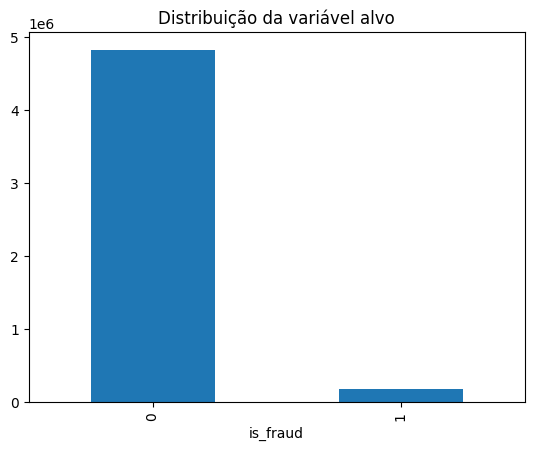

In [63]:
analyze_data(rna_dataset)

## **Ajustando classes**

É facilmente identificável a imparidade no número de amostras de cada classe.
Isso pode implicar em severas consequências na sensibilidade e habilidade de generalização dos modelos treinados

Apesar da discrepância relativa ser grande, o número absoluto de amostras da classe menos frequente (`is_fraud == 1`) é significativo: 179553

Desta forma, para resolver o problema, será realizado um *undersampling* da classe dominante. Isto é, remover um número de amostras da classe dominante para que ambas classes possuam valores similares de exemplos

Target:
Classe 0: 179553 (50.0000%)
Classe 1: 179553 (50.0000%)


,timestamp,amount,is_fraud,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,high_value_transfer,is_new_receiver,transaction_type_deposit,...,location_Tokyo,location_Toronto,device_used_atm,device_used_mobile,device_used_pos,device_used_web,payment_channel_ACH,payment_channel_UPI,payment_channel_card,payment_channel_wire_transfer
3705903,-1.372086,-0.687107,1,0.050610,1.009574,0.086474,-0.554435,0,0.001732,-0.577533,...,-0.378308,-0.377739,1.732383,-0.577699,-0.577091,-0.577372,-0.577424,1.733117,-0.577256,-0.577726
2868670,0.650647,0.297246,1,-0.273592,0.639872,-0.433742,1.351087,0,0.001732,-0.577533,...,-0.378308,-0.377739,1.732383,-0.577699,-0.577091,-0.577372,1.731828,-0.576995,-0.577256,-0.577726
3004561,0.650647,-0.740731,1,0.253197,-0.998806,0.953499,1.385732,0,0.001732,-0.577533,...,-0.378308,-0.377739,-0.577239,-0.577699,1.732829,-0.577372,1.731828,-0.576995,-0.577256,-0.577726
1984043,-0.216238,-0.680212,1,0.759707,1.669041,0.780094,-1.385935,0,0.001732,-0.577533,...,-0.378308,-0.377739,-0.577239,-0.577699,-0.577091,1.731985,-0.577424,-0.576995,-0.577256,1.730925
4182152,-0.938643,2.725186,1,-1.075794,0.729799,-1.474172,-0.138685,1,0.001732,1.731503,...,-0.378308,-0.377739,-0.577239,-0.577699,1.732829,-0.577372,1.731828,-0.576995,-0.577256,-0.577726


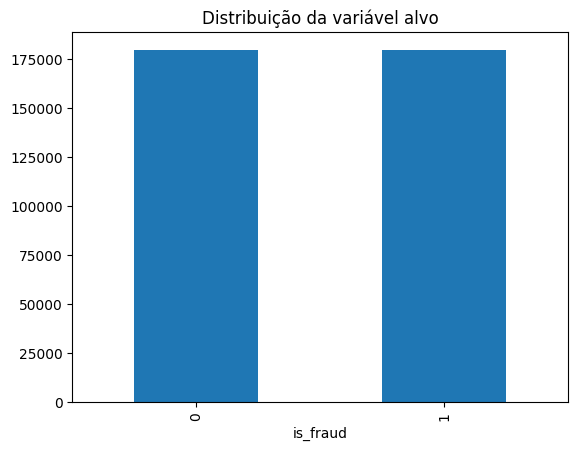

In [65]:
undersampler = RandomUnderSampler(random_state=42)
rna_resampled, _ = undersampler.fit_resample(rna_dataset, rna_dataset["is_fraud"])
dtc_resampled, _ = undersampler.fit_resample(dtc_dataset, dtc_dataset["is_fraud"])

analyse_target(dtc_resampled)
rna_resampled.sample(5)

## **Encontrando os melhores parametros**

Com as classes balanceadas e o dataset tratado o passo seguinte é encontrar os melhores parâmetros para que o modelos de Árvore de Decisão e *Multi Layer Perceptron* sejam mais eficientes

Para isso, será feita uma grid search em alguns parâmetros possíveis

Entretanto, antes de performar a grid search, será separada uma amostra menor do dataset para que viabilizar a realização do processo no tempo disponível para a RNA

In [66]:
shrinked_rna_dataset_X, _, shrinked_rna_dataset_y, _ = train_test_split(rna_resampled, rna_resampled["is_fraud"], train_size=0.1, stratify=rna_resampled["is_fraud"], random_state=42)  #10% do dataset

print(shrinked_rna_dataset_X.shape)

(35910, 37)


In [69]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [2, 7],
    'max_features': ['sqrt', 'log2'],
}

model = DecisionTreeClassifier(random_state=42)

grid_search_dtc = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring=['f1', 'accuracy'],
    refit='f1', 
    verbose=0,
    n_jobs=-1
)

grid_search_dtc.fit(dtc_resampled, dtc_resampled["is_fraud"])

print("Best parameters found:", grid_search_dtc.best_params_)
print("Best cross-validation score:", grid_search_dtc.best_score_)


Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation score: 0.9956549202420755


In [70]:

param_grid = {
    'hidden_layer_sizes': [(50,), (100, 50), (34, 100, 150, 50, 2)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

model = MLPClassifier(random_state=42)

grid_search_rna = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='f1', 
    verbose=1,
    n_jobs=-1
)

grid_search_rna.fit(shrinked_rna_dataset_X, shrinked_rna_dataset_y)

print("Best parameters found:", grid_search_rna.best_params_)
print("Best cross-validation score:", grid_search_rna.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 1.0


## **Treinando Modelos**

Separando os dados de treino e de teste

Realizando ao treinamento dos modelos

In [71]:
X_train_rna, X_test_rna, y_train_rna, y_test_rna = train_test_split(rna_resampled.drop(columns=["is_fraud"]), rna_resampled["is_fraud"], test_size=0.2, random_state=42)
X_train_dtc, X_test_dtc, y_train_dtc, y_test_dtc = train_test_split(dtc_resampled.drop(columns=["is_fraud"]), dtc_resampled["is_fraud"], test_size=0.2, random_state=42)

# Decision Tree Classifier with values not scaled
dt_classifier_unscaled = DecisionTreeClassifier(
    **grid_search_dtc.best_params_,
)
dt_classifier_unscaled.fit(X_train_dtc, y_train_dtc)
print("Decision Tree Classifier Score: ", dt_classifier_unscaled.score(X_test_dtc, y_test_dtc))

# Decision Tree Classifier with scaled values
dt_classifier_scaled = DecisionTreeClassifier(
    **grid_search_dtc.best_params_,
)
dt_classifier_scaled.fit(X_train_rna, y_train_rna)
print("Decision Tree Classifier Score: ", dt_classifier_scaled.score(X_test_rna, y_test_rna))

# Neural Network Classifier
nn_classifier = MLPClassifier(
    **grid_search_rna.best_params_,
)
nn_classifier.fit(X_train_rna, y_train_rna)
print("Neural Network Classifier Score: ", nn_classifier.score(X_test_rna, y_test_rna))

Decision Tree Classifier Score:  0.5441229706775083
Decision Tree Classifier Score:  0.5412129988025953
Neural Network Classifier Score:  0.5598006181949821


C:\Users\Pichau\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Decision Tree Classifier (Unscaled) Results:
Accuracy: 0.5441229706775083
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.57      0.56     36067
           1       0.54      0.52      0.53     35755

    accuracy                           0.54     71822
   macro avg       0.54      0.54      0.54     71822
weighted avg       0.54      0.54      0.54     71822



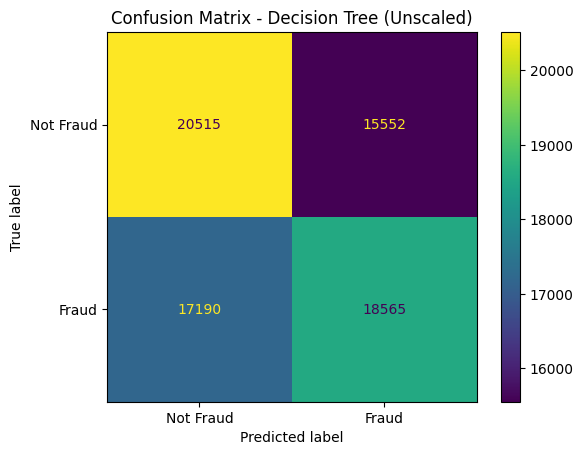

Decision Tree Classifier (Scaled) Results:
Accuracy: 0.5412129988025953
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.57      0.55     36067
           1       0.54      0.52      0.53     35755

    accuracy                           0.54     71822
   macro avg       0.54      0.54      0.54     71822
weighted avg       0.54      0.54      0.54     71822



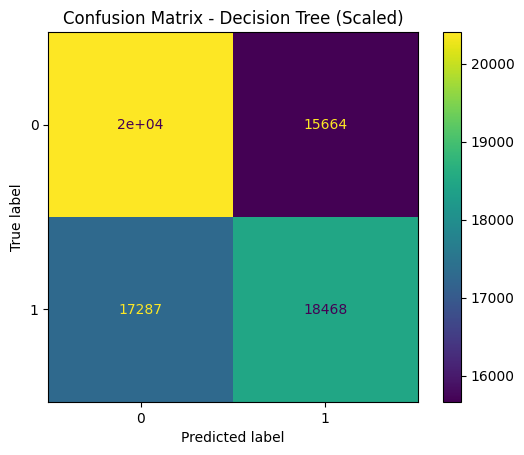

Neural Network Classifier Results:
Accuracy: 0.5598006181949821
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.44      0.50     36067
           1       0.55      0.68      0.61     35755

    accuracy                           0.56     71822
   macro avg       0.56      0.56      0.55     71822
weighted avg       0.56      0.56      0.55     71822



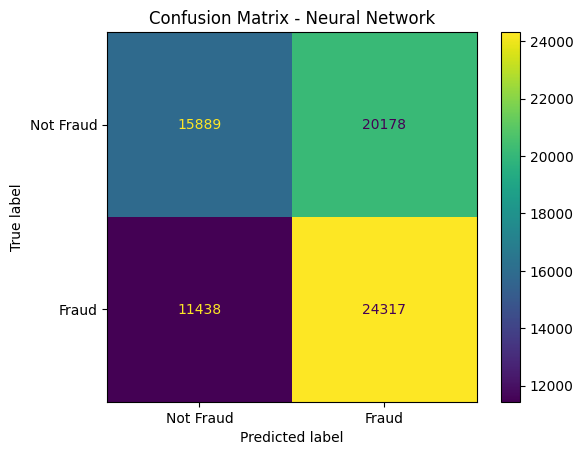

In [75]:
# Decision Tree Classifier (Unscaled)
print("Decision Tree Classifier (Unscaled) Results:")
y_pred_dtc_unscaled = dt_classifier_unscaled.predict(X_test_dtc)
print("Accuracy:", accuracy_score(y_test_dtc, y_pred_dtc_unscaled))
print("Classification Report:\n", classification_report(y_test_dtc, y_pred_dtc_unscaled))
ConfusionMatrixDisplay.from_predictions(y_test_dtc, y_pred_dtc_unscaled, values_format='.0f', display_labels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - Decision Tree (Unscaled)")
plt.show()

# Decision Tree Classifier (Scaled)
print("Decision Tree Classifier (Scaled) Results:")
y_pred_dtc_scaled = dt_classifier_scaled.predict(X_test_rna)
print("Accuracy:", accuracy_score(y_test_rna, y_pred_dtc_scaled))
print("Classification Report:\n", classification_report(y_test_rna, y_pred_dtc_scaled))
ConfusionMatrixDisplay.from_predictions(y_test_rna, y_pred_dtc_scaled)
plt.title("Confusion Matrix - Decision Tree (Scaled)")
plt.show()

# Neural Network Classifier
print("Neural Network Classifier Results:")
y_pred_nn = nn_classifier.predict(X_test_rna)
print("Accuracy:", accuracy_score(y_test_rna, y_pred_nn))
print("Classification Report:\n", classification_report(y_test_rna, y_pred_nn))
ConfusionMatrixDisplay.from_predictions(y_test_rna, y_pred_nn, values_format='.0f', display_labels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - Neural Network")
plt.show()